In [1]:
!pip install numpy==1.24.5
!pip install --upgrade scipy
!pip install tensorflow-probability
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement numpy==1.24.5 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0rc1, 1.23.0rc2, 1.23.0rc3, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 1.23.5, 1.24.0rc1, 1.24.0rc2, 1.24.0, 1.24.1, 1.24.2, 1.24.3, 1.24.4, 1.25.0rc1, 1.25.0, 1.25.1, 1.25.2, 1.26.0b1, 1.26.0rc1, 1.26.0, 1.26.1, 1.26.2, 1.26.3, 1.26.4, 2.0.0b1, 2.0.0r

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [10]:
from tqdm import tqdm
import json
import numpy as np
import pandas as pd
import torch
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from transformers import BertConfig, AutoTokenizer, TFAutoModelForSequenceClassification
import matplotlib.pyplot as plt

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    tpu = False

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [38]:
PATH_TRAIN_DS = "C:/Users/DELL/Documents/Python_projects/Intellihack_Task02/is_train.json"
PATH_VALID_DS = "C:/Users/DELL/Documents/Python_projects/Intellihack_Task02/is_val.json"
PATH_TEST_DS = "C:/Users/DELL/Documents/Python_projects/Intellihack_Task02/is_test.json"

In [39]:
test = np.array(json.load(open(PATH_TEST_DS, 'r')))
train = np.array(json.load(open(PATH_TRAIN_DS, 'r')))
val = np.array(json.load(open(PATH_VALID_DS, 'r')))

In [40]:
train[:,1]

array(['translate', 'translate', 'translate', ..., 'card_declined',
       'card_declined', 'card_declined'], dtype='<U136')

In [41]:
data_train = pd.DataFrame({
    'text' : train[:,0],
    'label': train[:,1]
})
data_val = pd.DataFrame({
    'text' : val[:,0],
    'label': val[:,1]
})
data_test = pd.DataFrame({
    'text' : test[:,0],
    'label': test[:,1]
})

In [42]:
data_val["text"]

0                in spanish, meet me tomorrow is said how
1                  in french, how do i say, see you later
2                        how do you say hello in japanese
3               how do i ask about the weather in chinese
4               how can i say "cancel my order" in french
                              ...                        
2995    i was at walmart trying to buy toilet paper an...
2996         target declined my card and i don't know why
2997    do you know why my card was declined at target...
2998    i can't figure out why my card was declined at...
2999    i was just at target and they declined my card...
Name: text, Length: 3000, dtype: object

In [44]:
intense = np.sort(np.unique(train[:,1]))
intense_to_id = {label:i for i,label in enumerate(intense)}
id_to_intense = {i:label for i,label in enumerate(intense)}
num_classes = len(intense)
print(f"No. of classes: {num_classes}")

Numero de clases: 150


In [46]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train['text'])
sequences = tokenizer.texts_to_sequences(data_train['text'])
max_length = 28
train_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(data_train['label'])

train_labels = to_categorical(train_labels_encoded, num_classes)

In [48]:
sequences_val = tokenizer.texts_to_sequences(data_val['text'])
val_sequences = pad_sequences(sequences_val, padding='post', maxlen=max_length)

val_labels_encoded = label_encoder.transform(data_val['label'])
val_labels = to_categorical(val_labels_encoded, num_classes)

sequences_test = tokenizer.texts_to_sequences(data_test['text'])
test_sequences = pad_sequences(sequences_test, padding='post',maxlen=max_length)

test_labels_encoded = label_encoder.transform(data_test['label'])
test_labels = to_categorical(test_labels_encoded, num_classes)

In [50]:
len(train_labels), train_labels.shape

(15000, (15000, 150))

In [51]:
train_labels = np.reshape(train_labels, (len(train_labels), 150))
val_labels = np.reshape(val_labels, (len(val_labels), 150))
test_labels = np.reshape(test_labels, (len(test_labels), 150))

In [52]:
val_sequences.shape, val_labels.shape,test_sequences.shape, test_labels.shape,

((3000, 28), (3000, 150), (4500, 28), (4500, 150))

In [53]:
word_index = tokenizer.word_index
vocab_size = len(word_index) +1
max_sequence_length = max(len(sequence) for sequence in train_sequences)
embedding_dim = min(100, vocab_size // 2)

In [56]:
def grafical_histogram(historial):

    training_loss = historial.history['loss']
    validation_loss = historial.history['val_loss']
    training_accuracy = historial.history['accuracy']
    validation_accuracy = historial.history['val_accuracy']

    history_df = pd.DataFrame({
        'Training Loss': training_loss,
        'Validation Loss': validation_loss,
        'Training Accuracy': training_accuracy,
        'Validation Accuracy': validation_accuracy
    })

    plt.figure(figsize=(10, 6))
    plt.plot(history_df['Training Loss'], label='Training Loss')
    plt.plot(history_df['Validation Loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history_df['Training Accuracy'], label='Training Accuracy')
    plt.plot(history_df['Validation Accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

### LSTM 

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.0112 - loss: 4.8708 - val_accuracy: 0.0263 - val_loss: 4.2500
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0381 - loss: 3.9279 - val_accuracy: 0.0647 - val_loss: 3.6034
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0970 - loss: 3.2567 - val_accuracy: 0.1910 - val_loss: 2.9326
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2554 - loss: 2.4831 - val_accuracy: 0.3893 - val_loss: 2.1848
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.4796 - loss: 1.6805 - val_accuracy: 0.5493 - val_loss: 1.6447
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6587 - loss: 1.1196 - val_accuracy: 0.6363 - val_loss: 1.3924
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7633 - loss: 0.7899 - val_accuracy: 0.7010 - val_loss: 1.2034
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8294 - loss: 0.5841 - val_accu

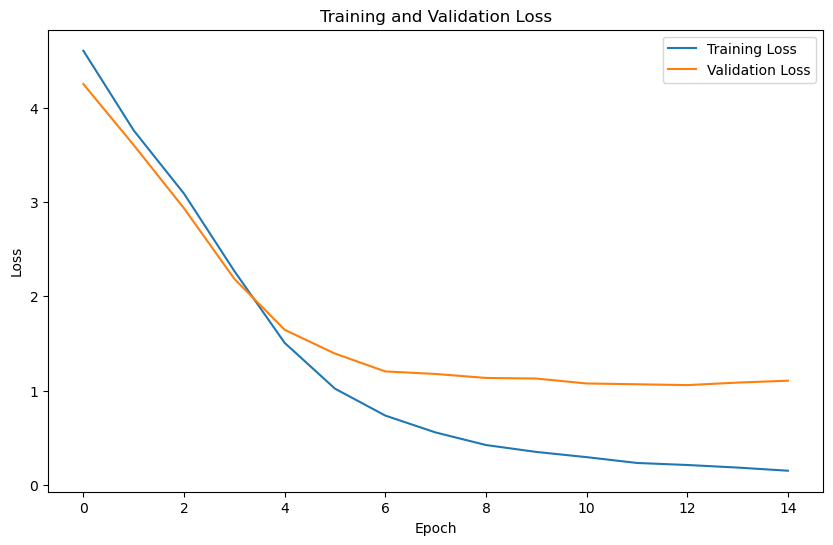

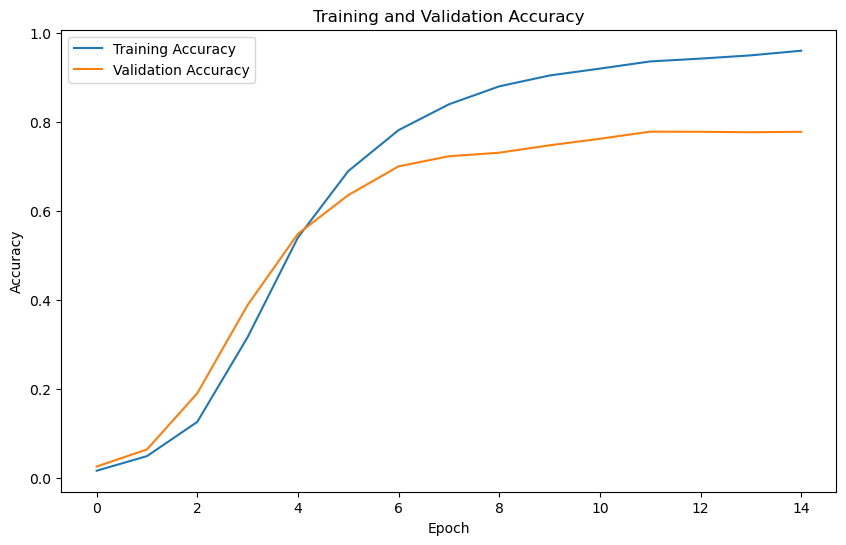

In [62]:
model_LSTM = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(128, input_shape=(train_sequences.shape[1], 1)),
    Dense(num_clases, activation='softmax')
])

model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

histo_LSTM = model_LSTM.fit(train_sequences, train_labels, epochs=15, validation_data=(val_sequences, val_labels))

loss, accuracy = model_LSTM.evaluate(test_sequences, test_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')
grafical_histogram(histo_LSTM)

In [ ]:
def classify_intent(text, threshold=0.7):
  # Tokenize and pad text
  sequence = tokenizer.texts_to_sequences([text])
  padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding="post")

  # Predict intent and confidence score
  intent_proba = model_LSTM.predict(padded_sequence)[0]
  print(np.argmax(intent_proba))
  predicted_intent = id_to_intense[np.argmax(intent_proba)]
  confidence = max(intent_proba)

  # Apply fallback mechanism
  if confidence < threshold:
    return "NLU fallback: Intent could not be confidently determined"
  else:
    return f"Predicted intent: {predicted_intent}, Confidence score: {confidence:.2f}"

In [ ]:
test_texts = [
  "send $20 from debit to steve's account",
  "i need a timer for 20 seconds",
  "tell me what edict means",
]

for text in test_texts:
  result = classify_intent(text)
  print(result)